In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
# Dataset

df = pd.read_csv('Walmart.csv')


In [3]:
# Dataframe

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# Statistics

df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
df.isna().sum()       # No null values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
# Unique values

df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [9]:
# Duplicates                   # No Duplicates

df.duplicated().any()

False

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'Weekly_Sales'}>,
        <Axes: title={'center': 'Holiday_Flag'}>],
       [<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Fuel_Price'}>,
        <Axes: title={'center': 'CPI'}>],
       [<Axes: title={'center': 'Unemployment'}>, <Axes: >, <Axes: >]],
      dtype=object)

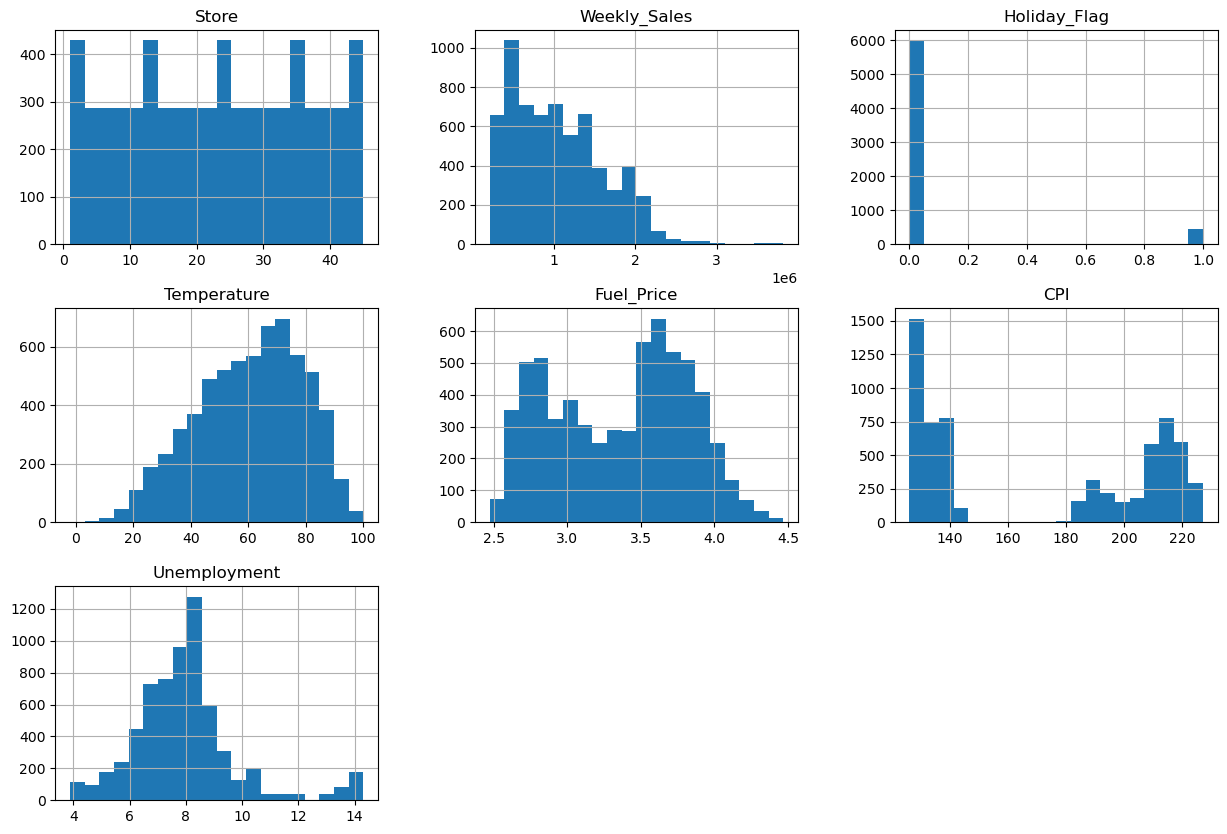

In [10]:
# Histograms                         # Normal distribution and Weely sales distribution is right skewed

df.hist(figsize=(15,10), bins= 20)

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

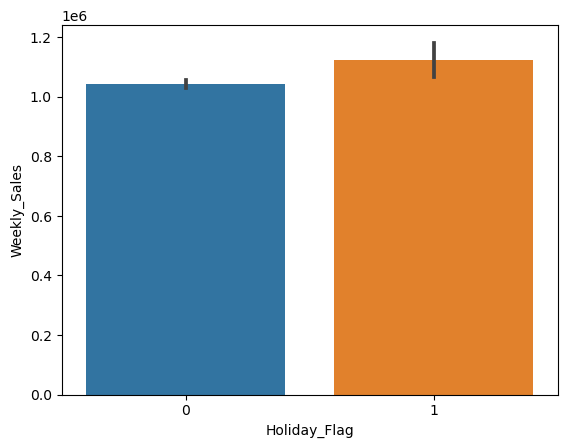

In [11]:
# Sales based on Holiday                                    # More sales during holidays

sns.barplot(x = df['Holiday_Flag'], y = df['Weekly_Sales'])

In [12]:
# Stores with Max. and Min.sales                      # Stores 20 & 4 --> Max. sales   Stores 44 & 33 --> Min. sales

df1 = df.groupby('Store')['Weekly_Sales'].sum()

df2 = df1.sort_values( ascending= False ).reset_index()

df2

,Store,Weekly_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08
5,10,2.716177e+08
6,27,2.538559e+08
7,6,2.237561e+08
8,1,2.224028e+08
9,39,2.074455e+08


In [13]:
df['Unemployment'].value_counts()         

8.099    78
8.163    56
7.852    56
8.200    52
6.565    52
         ..
7.138     4
8.665     4
8.000     4
9.151     4
5.217     4
Name: Unemployment, Length: 349, dtype: int64

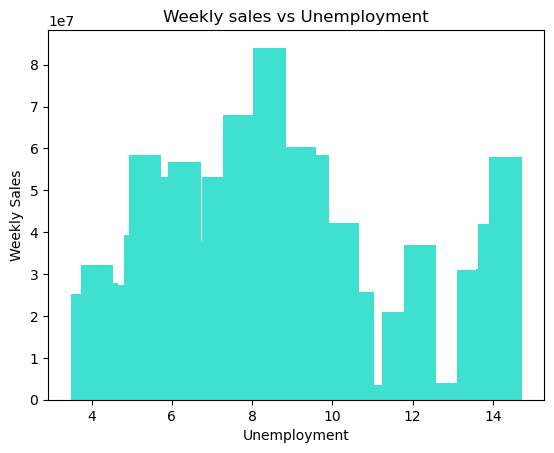

In [14]:
# Unemployment vs Weekly sales    # More sales when unemployment rate is 9

plt.bar(df['Unemployment'].unique(),df.groupby('Unemployment')['Weekly_Sales'].sum(), color = 'turquoise')
plt.title('Weekly sales vs Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()

In [15]:
df['Temperature'].value_counts()

50.43    11
67.87    10
76.67     9
76.03     9
70.28     9
         ..
34.93     1
38.53     1
41.10     1
45.54     1
74.09     1
Name: Temperature, Length: 3528, dtype: int64

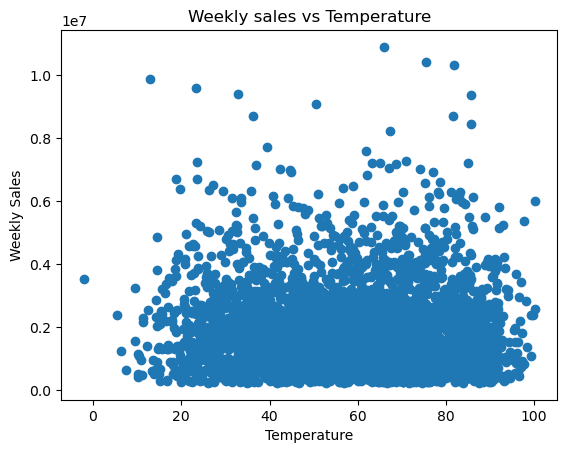

In [16]:
# Temperature vs weekly sales      # Minimum sales when Temperature is less than 20

plt.scatter(df['Temperature'].unique(), df.groupby('Temperature')['Weekly_Sales'].sum())
plt.title('Weekly sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

In [17]:
df['CPI'].value_counts()

130.550207    11
129.043200    11
127.580032    11
127.440484    11
127.300935    11
              ..
214.751084     1
214.815521     1
214.961638     1
215.107755     1
214.741539     1
Name: CPI, Length: 2145, dtype: int64

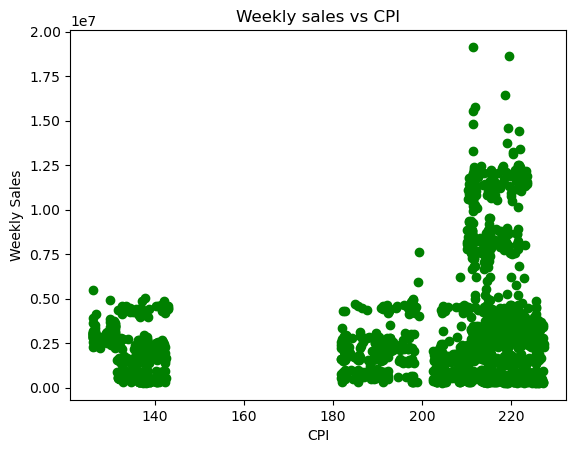

In [18]:
# CPI vs Weekly sales     --> Minimum sales when CPI is between 140 & 180

plt.scatter(df['CPI'].unique(), df.groupby('CPI')['Weekly_Sales'].sum(), color = 'green')
plt.title('Weekly sales vs CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

In [19]:
# convert date format

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df['Date']

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [20]:
# Extract year and month features

df['Year'] = df['Date'].dt.year

df['Month'] = df['Date'].dt.month

df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


In [21]:
# Linear Regression 

# Features

x = ['Store', 'Year', 'Month', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

In [22]:
#  Target

y = ['Weekly_Sales']

In [23]:
# Train-test split

x_train, x_test, y_train, y_test = train_test_split(df[x], df[y] , test_size = 0.30)


In [24]:
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [25]:
x_train

,Store,Year,Month,Temperature,Fuel_Price,CPI,Unemployment
1017,8,2010,5,74.71,2.759,214.250032,6.290
2622,19,2011,1,31.34,3.351,132.882323,7.771
2315,17,2010,8,65.17,2.837,126.064000,6.697
2119,15,2012,5,51.04,4.124,138.033200,8.150
2636,19,2011,4,48.67,3.981,134.278467,7.658
...,...,...,...,...,...,...,...
3105,22,2012,1,29.16,3.542,140.808612,7.503
2486,18,2011,2,26.15,3.281,133.492143,9.131
4577,33,2010,2,55.47,2.828,126.496258,10.115
882,7,2010,7,64.64,2.691,189.774698,9.017


In [26]:
y_train

,Weekly_Sales
1017,868041.56
2622,1224175.99
2315,759995.18
2119,577868.38
2636,1392093.04
...,...
3105,897027.44
2486,1005983.31
4577,294882.83
882,570231.21


In [27]:
x_test

,Store,Year,Month,Temperature,Fuel_Price,CPI,Unemployment
4921,35,2011,3,40.11,3.625,137.847893,8.549
314,3,2010,8,88.02,2.664,214.931419,7.346
5953,42,2011,10,72.79,3.843,129.793677,7.874
6315,45,2010,7,77.84,2.783,182.260441,8.743
4094,29,2011,10,49.31,3.604,136.488452,9.357
...,...,...,...,...,...,...,...
5467,39,2010,9,78.50,2.624,210.366447,8.360
1994,14,2012,9,75.70,3.911,191.577676,8.684
4652,33,2011,7,97.17,3.697,129.150774,8.442
5343,38,2011,2,45.14,3.348,127.719581,14.021


In [28]:
y_test

,Weekly_Sales
4921,762184.10
314,351728.21
5953,515599.70
6315,723708.99
4094,515119.64
...,...
5467,1199449.54
1994,1904512.34
4652,238915.05
5343,402341.76


In [29]:
y_pred = lr.predict(x_test)

y_pred

array([[ 914714.19435158],
       [1227725.83249475],
       [ 922129.3425092 ],
       ...,
       [ 937304.20570745],
       [ 730225.41136148],
       [1188958.31840544]])

In [30]:
# RMSE

rmse = mean_squared_error(y_test, y_pred, squared= False)

rmse

517839.6037211343

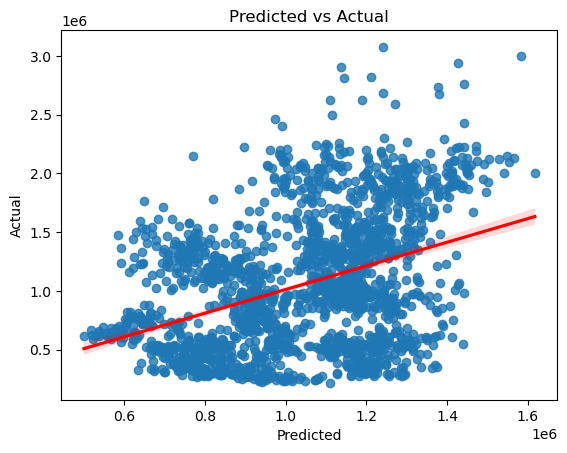

In [31]:
# Actual vs predicted 

sns.regplot(x= y_pred, y= y_test, line_kws = {'color' : 'red'} )
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [32]:
# Data frame for Stores 

Stores = {}

for i in range(1,len(df.Store.unique())+1) :
    Stores[i] = df[df['Store'] == i]
    

In [33]:
Stores

{1:      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
 0        1 2010-02-05    1643690.90             0        42.31       2.572   
 1        1 2010-02-12    1641957.44             1        38.51       2.548   
 2        1 2010-02-19    1611968.17             0        39.93       2.514   
 3        1 2010-02-26    1409727.59             0        46.63       2.561   
 4        1 2010-03-05    1554806.68             0        46.50       2.625   
 ..     ...        ...           ...           ...          ...         ...   
 138      1 2012-09-28    1437059.26             0        76.08       3.666   
 139      1 2012-10-05    1670785.97             0        68.55       3.617   
 140      1 2012-10-12    1573072.81             0        62.99       3.601   
 141      1 2012-10-19    1508068.77             0        67.97       3.594   
 142      1 2012-10-26    1493659.74             0        69.16       3.506   
 
             CPI  Unemployment  Year  Month  
 

In [34]:
Stores[1]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3
...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,2012,9
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573,2012,10
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573,2012,10
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,2012,10


In [35]:
# Date and weekly sales --> Store 1

df3 = Stores[1]

df3 = df3.loc[: , ['Date', 'Weekly_Sales']]

df3.index = df3['Date']

df3.drop(['Date'], axis = 1, inplace = True)

df3.head()

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68


In [36]:
df3.shape

(143, 1)

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  143 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [38]:
# Rolling mean for store 1 --> 52 weeks

roll_mean = df3.rolling(window= 52).mean()


roll_mean 


,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,1.613969e+06
2012-10-05,1.614734e+06
2012-10-12,1.616264e+06


In [39]:
# Removing trend

roll_mean_detrend = df3-roll_mean

roll_mean_detrend

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,-176909.317308
2012-10-05,56052.084615
2012-10-12,-43190.823077


In [40]:
# Removing seasonality

roll_mean_decomposed_diff = roll_mean_detrend-roll_mean_detrend.shift()

roll_mean_decomposed_diff

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,-69884.058269
2012-10-05,232961.401923
2012-10-12,-99242.907692


In [41]:
roll_mean_decomposed_diff.dropna(inplace=True)

roll_mean_decomposed_diff

,Weekly_Sales
Date,
2011-02-04,290442.987692
2011-02-11,42838.090577
2011-02-18,35787.953654
2011-02-25,-230947.744038
2011-03-04,177896.654423
...,...
2012-09-28,-69884.058269
2012-10-05,232961.401923
2012-10-12,-99242.907692


In [42]:
# Predictive modelling - Time series analysis using SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

# Train data
train = roll_mean_decomposed_diff.iloc[ : 73]['Weekly_Sales']

# Test data
test = roll_mean_decomposed_diff.iloc[73 : ]['Weekly_Sales']


# # SARIMAX
model = SARIMAX(train,order = (1,0,1), seasonal_order=(1,0,1,52), enforce_stationarity= False)

model = model.fit()

    

C:\Users\karthik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\karthik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\karthik\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\karthik\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
train

Date
2011-02-04    290442.987692
2011-02-11     42838.090577
2011-02-18     35787.953654
2011-02-25   -230947.744038
2011-03-04    177896.654423
                  ...      
2012-05-25    -42176.510000
2012-06-01     69236.892115
2012-06-08     70671.021538
2012-06-15    -68518.039615
2012-06-22   -104473.029615
Name: Weekly_Sales, Length: 73, dtype: float64

In [44]:
test

Date
2012-06-29     11577.922308
2012-07-06    224913.352308
2012-07-13   -244222.698269
2012-07-20    -31002.125000
2012-07-27    -60502.279231
2012-08-03    191882.233077
2012-08-10    -40019.336923
2012-08-17      4167.568077
2012-08-24   -104311.610769
2012-08-31     87348.439615
2012-09-07     77351.312885
2012-09-14   -144399.404038
2012-09-21    -13727.921346
2012-09-28    -69884.058269
2012-10-05    232961.401923
2012-10-12    -99242.907692
2012-10-19    -65109.924423
2012-10-26    -15340.004038
Name: Weekly_Sales, dtype: float64

In [45]:
len(train)+len(test)- 1

90

<Axes: xlabel='Date'>

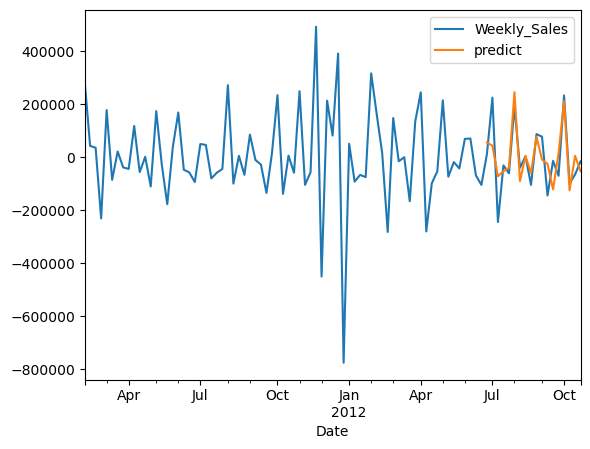

In [46]:
roll_mean_decomposed_diff['predict'] = model.predict(start = len(train), 
                                                     end= len(train)+len(test)- 1, 
                                                     dynamic = True)

roll_mean_decomposed_diff[['Weekly_Sales', 'predict']].plot()


In [47]:
roll_mean_decomposed_diff

,Weekly_Sales,predict
Date,,
2011-02-04,290442.987692,NaN
2011-02-11,42838.090577,NaN
2011-02-18,35787.953654,NaN
2011-02-25,-230947.744038,NaN
2011-03-04,177896.654423,NaN
...,...,...
2012-09-28,-69884.058269,14189.338909
2012-10-05,232961.401923,211199.345311
2012-10-12,-99242.907692,-124562.329696


In [48]:
roll_mean_decomposed_diff.isna().sum()

Weekly_Sales     0
predict         73
dtype: int64

In [49]:
roll_mean_decomposed_diff.drop('predict', axis =1, inplace=True)

roll_mean_decomposed_diff

,Weekly_Sales
Date,
2011-02-04,290442.987692
2011-02-11,42838.090577
2011-02-18,35787.953654
2011-02-25,-230947.744038
2011-03-04,177896.654423
...,...
2012-09-28,-69884.058269
2012-10-05,232961.401923
2012-10-12,-99242.907692


In [50]:
# Forecast for the next 52 weeks

forecast = model.forecast( steps = 52)

forecast

2012-06-29     55223.828949
2012-07-06     43686.497299
2012-07-13    -71659.486356
2012-07-20    -52544.526800
2012-07-27    -39872.003727
2012-08-03    245297.795530
2012-08-10    -89720.333437
2012-08-17      4849.348425
2012-08-24    -59785.466393
2012-08-31     77067.465429
2012-09-07     -9302.116261
2012-09-14    -25032.762274
2012-09-21   -121528.133373
2012-09-28     14189.338909
2012-10-05    211199.345311
2012-10-12   -124562.329696
2012-10-19      5459.191588
2012-10-26    -52737.287622
2012-11-02    224809.513912
2012-11-09    -94004.505339
2012-11-16    -50979.989672
2012-11-23    444163.112613
2012-11-30   -405872.447732
2012-12-07    192482.513875
2012-12-14     73709.572180
2012-12-21    353008.053610
2012-12-28   -699305.283100
2013-01-04     45937.329781
2013-01-11    -83038.969501
2013-01-18    -59960.373586
2013-01-25    -67747.263853
2013-02-01    269879.140691
2013-02-08    146339.237873
2013-02-15     -8942.471051
2013-02-22    -79280.172665
2013-03-01     -1015

Text(0.5, 1.0, 'Store 1 : Sales Forecast')

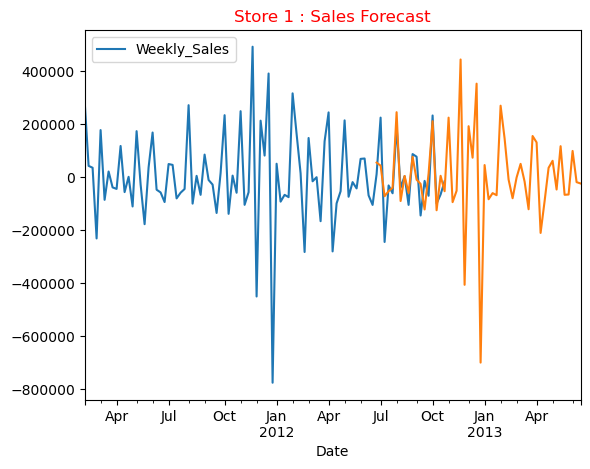

In [51]:
roll_mean_decomposed_diff.plot()

forecast.plot()

plt.title(f'Store 1 : Sales Forecast', fontdict = {'color' : 'Red'})

In [52]:
# store 2

df4 = Stores[2]

df4 = df4.loc[: , ['Date', 'Weekly_Sales']]

df4.index = df4['Date']

df4.drop(['Date'], axis = 1, inplace = True)

df4.head()

df4

,Weekly_Sales
Date,
2010-02-05,2136989.46
2010-02-12,2137809.50
2010-02-19,2124451.54
2010-02-26,1865097.27
2010-03-05,1991013.13
...,...
2012-09-28,1746470.56
2012-10-05,1998321.04
2012-10-12,1900745.13


In [53]:
# rolling mean

roll_mean_4 = df4.rolling(window= 52).mean()


roll_mean_4 



,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,1.947593e+06
2012-10-05,1.950684e+06
2012-10-12,1.953701e+06


In [54]:
# Removing trend

roll_mean_detrend_4 = df4-roll_mean_4

roll_mean_detrend_4

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,-201122.220192
2012-10-05,47636.575000
2012-10-12,-52955.930000


In [55]:
# Removing seasonality

roll_mean_decomposed_diff_4 = roll_mean_detrend_4-roll_mean_detrend_4.shift()

roll_mean_decomposed_diff_4

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,-84792.727692
2012-10-05,248758.795192
2012-10-12,-100592.505000


In [56]:
roll_mean_decomposed_diff_4.dropna(inplace=True)

roll_mean_decomposed_diff_4

,Weekly_Sales
Date,
2011-02-04,237967.689038
2011-02-11,238113.993269
2011-02-18,-86318.968462
2011-02-25,-246766.313269
2011-03-04,148277.572115
...,...
2012-09-28,-84792.727692
2012-10-05,248758.795192
2012-10-12,-100592.505000


In [57]:
# Predictive modelling - Time series analysis using SARIMAX

# from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

# Train data
train_4 = roll_mean_decomposed_diff_4.iloc[ : 73]['Weekly_Sales']

# Test data
test_4 = roll_mean_decomposed_diff_4.iloc[73 : ]['Weekly_Sales']


# # SARIMAX
model_4 = SARIMAX(train_4, order = (1,0,1), seasonal_order=(1,0,1,52), enforce_stationarity= False)

model_4 = model_4.fit()

C:\Users\karthik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\karthik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\karthik\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<Axes: xlabel='Date'>

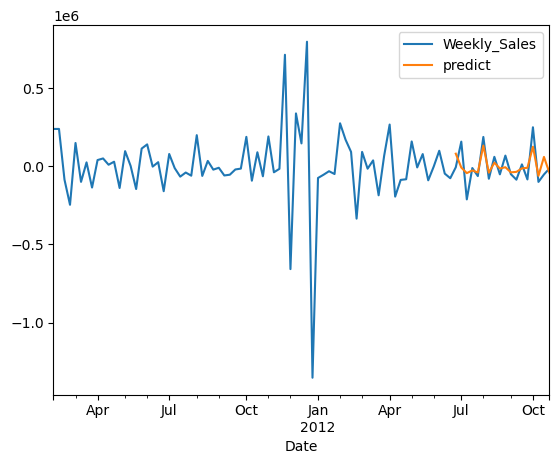

In [58]:
roll_mean_decomposed_diff_4['predict'] = model_4.predict(start = len(train_4), 
                                                         end= len(train)+len(test_4)- 1, 
                                                         dynamic = True)

roll_mean_decomposed_diff_4[['Weekly_Sales', 'predict']].plot()


In [59]:
roll_mean_decomposed_diff_4.isna().sum()

Weekly_Sales     0
predict         73
dtype: int64

In [60]:
roll_mean_decomposed_diff_4.drop('predict', axis=1, inplace= True)

roll_mean_decomposed_diff_4

,Weekly_Sales
Date,
2011-02-04,237967.689038
2011-02-11,238113.993269
2011-02-18,-86318.968462
2011-02-25,-246766.313269
2011-03-04,148277.572115
...,...
2012-09-28,-84792.727692
2012-10-05,248758.795192
2012-10-12,-100592.505000


In [61]:
# Store2 sales Forecast for next 52 weeks

forecast_4 = model_4.forecast(steps = 52)

forecast_4

2012-06-29     79922.257848
2012-07-06     -8748.945729
2012-07-13    -44470.379175
2012-07-20    -27059.391259
2012-07-27    -40443.147519
2012-08-03    131941.674670
2012-08-10    -41506.440037
2012-08-17     22383.358668
2012-08-24    -14741.531565
2012-08-31     -6787.576558
2012-09-07    -39526.352525
2012-09-14    -36347.921842
2012-09-21    -14040.571850
2012-09-28    -10329.628524
2012-10-05    124727.791142
2012-10-12    -61719.034438
2012-10-19     59187.809744
2012-10-26    -43108.279443
2012-11-02    126468.796997
2012-11-09    -26012.758853
2012-11-16    -11279.457095
2012-11-23    474125.914467
2012-11-30   -438060.446474
2012-12-07    224509.685261
2012-12-14     96898.257569
2012-12-21    529655.170545
2012-12-28   -900303.740023
2013-01-04    -50256.202874
2013-01-11    -36478.262732
2013-01-18    -21428.291415
2013-01-25    -33414.498370
2013-02-01    157747.725344
2013-02-08     72433.769831
2013-02-15     75179.817880
2013-02-22   -181796.950495
2013-03-01     35855

Text(0.5, 1.0, 'Store 2 : Sales Forecast')

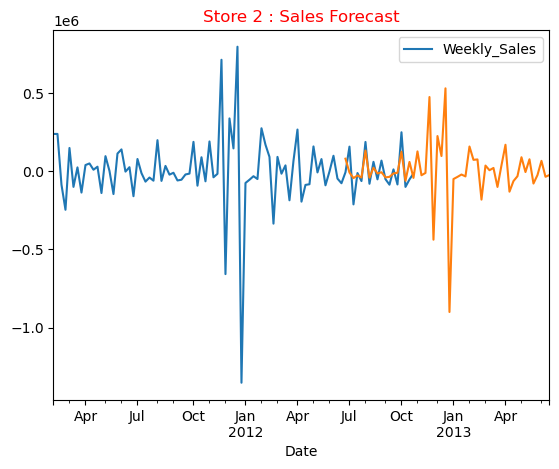

In [62]:
roll_mean_decomposed_diff_4.plot()

forecast_4.plot()


plt.title(label = f'Store 2 : Sales Forecast', fontdict = { 'color' : 'Red' } )

In [72]:
# Store 37

store_37 = Stores[37]

store_37 = store_37.loc[: , ['Date', 'Weekly_Sales']]

store_37.index = store_37['Date']

store_37.drop(['Date'], axis = 1, inplace = True)

store_37.head()

store_37

,Weekly_Sales
Date,
2010-02-05,536006.73
2010-02-12,529852.70
2010-02-19,510382.50
2010-02-26,513615.82
2010-03-05,519255.68
...,...
2012-09-28,527953.14
2012-10-05,546122.37
2012-10-12,521810.75


In [78]:
# rolling mean

roll_mean_37 = store_37.rolling(window=52).mean()

roll_mean_37

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,524948.793269
2012-10-05,525396.976346
2012-10-12,525554.182885


In [80]:
# remove trend

roll_mean_detrend_37 = store_37-roll_mean_37

roll_mean_detrend_37

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,3004.346731
2012-10-05,20725.393654
2012-10-12,-3743.432885


In [82]:
# remove seasonality

store_37_decompose_diff = roll_mean_detrend_37-roll_mean_detrend_37.shift()

store_37_decompose_diff

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,6410.024615
2012-10-05,17721.046923
2012-10-12,-24468.826538


In [84]:
# remove NaN

store_37_decompose_diff.dropna(inplace=True)

store_37_decompose_diff

,Weekly_Sales
Date,
2011-02-04,69243.042115
2011-02-11,-61179.737308
2011-02-18,13817.558654
2011-02-25,-22104.468654
2011-03-04,12654.125962
...,...
2012-09-28,6410.024615
2012-10-05,17721.046923
2012-10-12,-24468.826538


In [94]:
# SARIMAX

train_37 = store_37_decompose_diff.iloc[ : 73 ]

test_37 = store_37_decompose_diff.iloc[73:]

model_37 = SARIMAX(train_37, order = (1,0,1), seasonal_order=(1,0,1,52), enforce_stationarity= False)

model_37 = model_37.fit()

C:\Users\karthik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\karthik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\karthik\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [96]:
len(test_37)

18

In [99]:
store_37_decompose_diff['predict'] = model_37.predict(start = len(train_37),
                                                           end = len(train_37)+len(test)- 1, 
                                                           dynamic = True)

store_37_decompose_diff

,Weekly_Sales,predict
Date,,
2011-02-04,69243.042115,NaN
2011-02-11,-61179.737308,NaN
2011-02-18,13817.558654,NaN
2011-02-25,-22104.468654,NaN
2011-03-04,12654.125962,NaN
...,...,...
2012-09-28,6410.024615,56.877415
2012-10-05,17721.046923,3290.182402
2012-10-12,-24468.826538,-4830.025063


<Axes: xlabel='Date'>

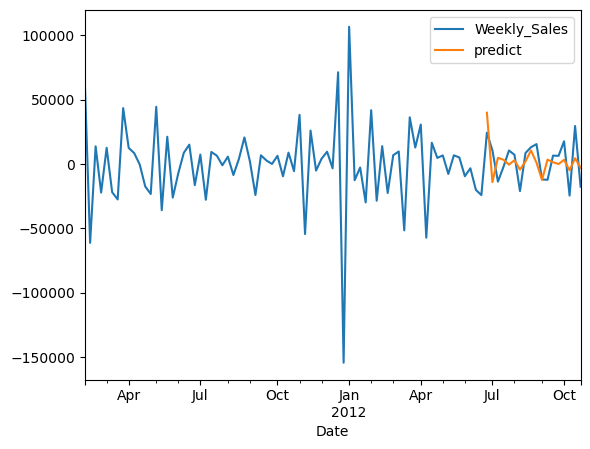

In [103]:
# Weekly sales vs prediction -> Store  37

store_37_decompose_diff[['Weekly_Sales','predict']].plot()

In [106]:
# Forecast

forecast_37 = model_37.forecast(steps = 52)

forecast_37

2012-06-29    39905.747282
2012-07-06   -14000.497882
2012-07-13     4866.282273
2012-07-20     3380.545709
2012-07-27     -417.345715
2012-08-03     2978.026114
2012-08-10    -4302.673098
2012-08-17     2067.884201
2012-08-24    10602.125868
2012-08-31     1055.664751
2012-09-07   -12238.427776
2012-09-14     3499.038380
2012-09-21     1428.674018
2012-09-28       56.877415
2012-10-05     3290.182402
2012-10-12    -4830.025063
2012-10-19     4542.090881
2012-10-26    -2804.802380
2012-11-02    19512.889385
2012-11-09   -27732.380122
2012-11-16    13281.547307
2012-11-23    -2573.533712
2012-11-30     2131.847206
2012-12-07     4889.903577
2012-12-14    -1699.823798
2012-12-21    36388.879403
2012-12-28   -78719.441952
2013-01-04    54442.665592
2013-01-11    -6390.095265
2013-01-18    -1356.277993
2013-01-25   -15193.658758
2013-02-01    17662.325772
2013-02-08    -9966.710830
2013-02-15     6055.967465
2013-02-22    -9824.738286
2013-03-01     2549.224041
2013-03-08     6610.454092
2

Text(0.5, 1.0, 'Store 37 : Sales Forecast')

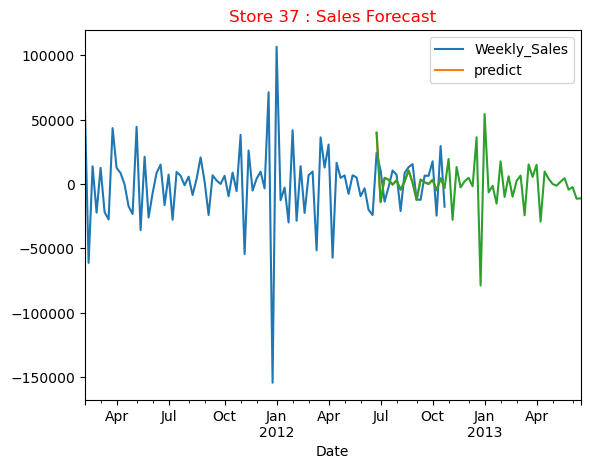

In [110]:
store_37_decompose_diff.plot()

forecast_37.plot()

plt.title(f'Store 37 : Sales Forecast', fontdict = { 'color' : 'Red'})

In [111]:
# Store 42

store_42 = Stores[42]

store_42 = store_42.loc[: , ['Date', 'Weekly_Sales']]

store_42.index = store_42['Date']

store_42.drop(['Date'], axis = 1, inplace = True)

store_42.head()

store_42

,Weekly_Sales
Date,
2010-02-05,543384.01
2010-02-12,575709.96
2010-02-19,508794.87
2010-02-26,491510.58
2010-03-05,554972.42
...,...
2012-09-28,505978.46
2012-10-05,593162.53
2012-10-12,612379.90


In [113]:
roll_mean_42 = store_42.rolling(window = 52).mean()

roll_mean_42

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,579805.399615
2012-10-05,578729.463077
2012-10-12,578707.324423


In [114]:
roll_mean_detrend_42 = store_42-roll_mean_42

print(roll_mean_detrend_42)

            Weekly_Sales
Date                    
2010-02-05           NaN
2010-02-12           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-05           NaN
...                  ...
2012-09-28 -73826.939615
2012-10-05  14433.066923
2012-10-12  33672.575577
2012-10-19 -37379.778462
2012-10-26 -64014.455000

[143 rows x 1 columns]


In [116]:
store_42_decompose_diff = roll_mean_detrend_42-roll_mean_detrend_42.shift()

store_42_decompose_diff

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,-21105.214423
2012-10-05,88260.006538
2012-10-12,19239.508654


In [118]:
store_42_decompose_diff.dropna(inplace=True)

store_42_decompose_diff

,Weekly_Sales
Date,
2011-02-04,86967.790192
2011-02-11,40170.913846
2011-02-18,-72495.899808
2011-02-25,-30261.664231
2011-03-04,43669.063462
...,...
2012-09-28,-21105.214423
2012-10-05,88260.006538
2012-10-12,19239.508654


In [120]:
train_42 = store_42_decompose_diff.iloc[:73]

train_42

,Weekly_Sales
Date,
2011-02-04,86967.790192
2011-02-11,40170.913846
2011-02-18,-72495.899808
2011-02-25,-30261.664231
2011-03-04,43669.063462
...,...
2012-05-25,-55496.209423
2012-06-01,-13365.501538
2012-06-08,120218.286731


In [121]:
test_42 = store_42_decompose_diff.iloc[73:]

test_42

,Weekly_Sales
Date,
2012-06-29,-32647.903462
2012-07-06,110808.554231
2012-07-13,8697.081154
2012-07-20,-98146.115000
2012-07-27,-14679.553269
2012-08-03,56723.242692
2012-08-10,4045.733654
2012-08-17,-1571.694423
2012-08-24,-41072.597115


In [123]:
model_42 = SARIMAX(train_42, order= (1,0,1), seasonal_order=(1,0,1,52), enforce_stationarity=False)



C:\Users\karthik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\karthik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [124]:
model_42 = model_42.fit()

C:\Users\karthik\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\karthik\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [126]:
store_42_decompose_diff['predict'] = model.predict(start = len(train_42), 
                                                   end = len(train_42)+len(test_42)- 1,
                                                   dynamic = True)

store_42_decompose_diff

,Weekly_Sales,predict
Date,,
2011-02-04,86967.790192,NaN
2011-02-11,40170.913846,NaN
2011-02-18,-72495.899808,NaN
2011-02-25,-30261.664231,NaN
2011-03-04,43669.063462,NaN
...,...,...
2012-09-28,-21105.214423,14189.338909
2012-10-05,88260.006538,211199.345311
2012-10-12,19239.508654,-124562.329696


<Axes: xlabel='Date'>

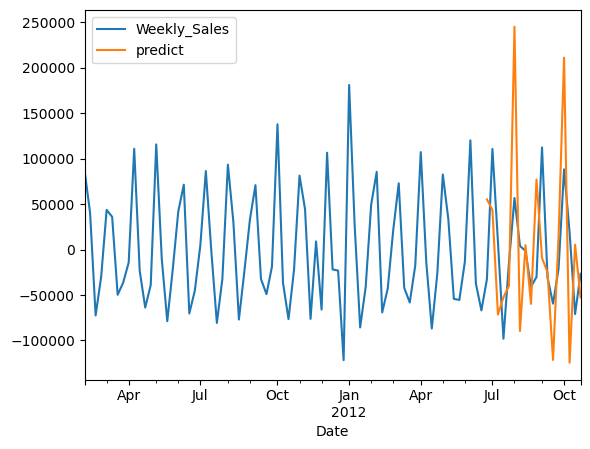

In [128]:
store_42_decompose_diff[['Weekly_Sales', 'predict']].plot()

In [129]:
# Forecast

forecast_42 = model.forecast(steps = 52)

forecast_42

2012-06-29     55223.828949
2012-07-06     43686.497299
2012-07-13    -71659.486356
2012-07-20    -52544.526800
2012-07-27    -39872.003727
2012-08-03    245297.795530
2012-08-10    -89720.333437
2012-08-17      4849.348425
2012-08-24    -59785.466393
2012-08-31     77067.465429
2012-09-07     -9302.116261
2012-09-14    -25032.762274
2012-09-21   -121528.133373
2012-09-28     14189.338909
2012-10-05    211199.345311
2012-10-12   -124562.329696
2012-10-19      5459.191588
2012-10-26    -52737.287622
2012-11-02    224809.513912
2012-11-09    -94004.505339
2012-11-16    -50979.989672
2012-11-23    444163.112613
2012-11-30   -405872.447732
2012-12-07    192482.513875
2012-12-14     73709.572180
2012-12-21    353008.053610
2012-12-28   -699305.283100
2013-01-04     45937.329781
2013-01-11    -83038.969501
2013-01-18    -59960.373586
2013-01-25    -67747.263853
2013-02-01    269879.140691
2013-02-08    146339.237873
2013-02-15     -8942.471051
2013-02-22    -79280.172665
2013-03-01     -1015

Text(0.5, 1.0, 'Store 42 : Sales Forecast')

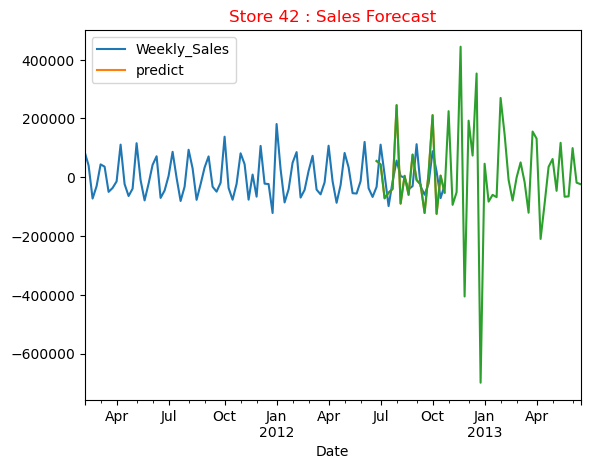

In [134]:
store_42_decompose_diff.plot()

forecast_42.plot()

plt.title(f'Store 42 : Sales Forecast', fontdict={'color' : 'Red'} )

In [135]:
#  Store 45

store_45 = Stores[45]

store_45 = store_45.loc[: , ['Date', 'Weekly_Sales']]

store_45.index = store_45['Date']

store_45.drop(['Date'], axis = 1, inplace = True)

store_45.head()

store_45

,Weekly_Sales
Date,
2010-02-05,890689.51
2010-02-12,656988.64
2010-02-19,841264.04
2010-02-26,741891.65
2010-03-05,777951.22
...,...
2012-09-28,713173.95
2012-10-05,733455.07
2012-10-12,734464.36


In [136]:
roll_mean_45 = store_45.rolling(window = 52).mean()

roll_mean_45

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,801817.922308
2012-10-05,801433.461154
2012-10-12,801693.410577


In [137]:
roll_mean_detrend_45 = store_45-roll_mean_45

roll_mean_detrend_45

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,-88643.972308
2012-10-05,-67978.391154
2012-10-12,-67229.050577


In [138]:
store_45_decompose_diff = roll_mean_detrend_45-roll_mean_detrend_45.shift()

store_45_decompose_diff

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,-10185.088654
2012-10-05,20665.581154
2012-10-12,749.340577


In [139]:
store_45_decompose_diff.dropna(inplace=True)

In [140]:
store_45_decompose_diff

,Weekly_Sales
Date,
2011-02-04,144758.734231
2011-02-11,4908.528462
2011-02-18,36547.614423
2011-02-25,-68379.420962
2011-03-04,28472.635000
...,...
2012-09-28,-10185.088654
2012-10-05,20665.581154
2012-10-12,749.340577


In [141]:
train_45 = store_45_decompose_diff.iloc[:73]

train_45

,Weekly_Sales
Date,
2011-02-04,144758.734231
2011-02-11,4908.528462
2011-02-18,36547.614423
2011-02-25,-68379.420962
2011-03-04,28472.635000
...,...
2012-05-25,16897.199231
2012-06-01,20178.052692
2012-06-08,-41641.203654


In [142]:
test_45 = store_45_decompose_diff.iloc[73:]

test_45

,Weekly_Sales
Date,
2012-06-29,-48852.843462
2012-07-06,68557.947885
2012-07-13,-93570.594615
2012-07-20,-12126.283846
2012-07-27,-26076.504808
2012-08-03,14832.303269
2012-08-10,7137.494038
2012-08-17,-10735.278654
2012-08-24,-2038.770962


In [143]:
model_45 = SARIMAX(train_45, order= (1,0,1), seasonal_order=(1,0,1,52), enforce_stationarity=False)

C:\Users\karthik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\karthik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [144]:
model_45 = model_45.fit()

C:\Users\karthik\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [145]:
store_45_decompose_diff['predict'] = model.predict(start = len(train_45), 
                                                   end = len(train_45)+len(test_45)- 1,
                                                   dynamic = True)

store_45_decompose_diff

,Weekly_Sales,predict
Date,,
2011-02-04,144758.734231,NaN
2011-02-11,4908.528462,NaN
2011-02-18,36547.614423,NaN
2011-02-25,-68379.420962,NaN
2011-03-04,28472.635000,NaN
...,...,...
2012-09-28,-10185.088654,14189.338909
2012-10-05,20665.581154,211199.345311
2012-10-12,749.340577,-124562.329696


<Axes: xlabel='Date'>

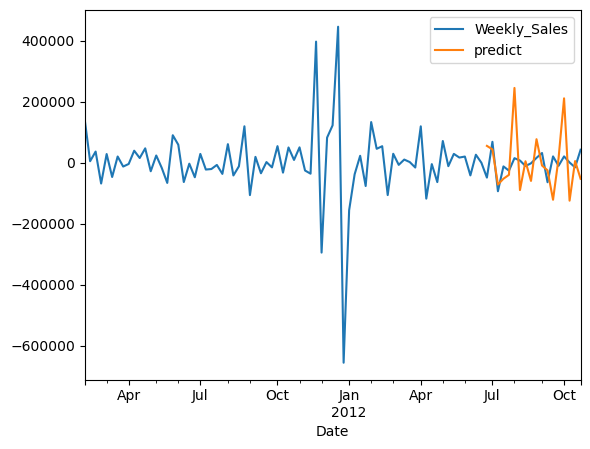

In [146]:
store_45_decompose_diff[['Weekly_Sales', 'predict']].plot()

In [147]:
# Forecast

forecast_45 = model.forecast(steps = 52)

forecast_45

2012-06-29     55223.828949
2012-07-06     43686.497299
2012-07-13    -71659.486356
2012-07-20    -52544.526800
2012-07-27    -39872.003727
2012-08-03    245297.795530
2012-08-10    -89720.333437
2012-08-17      4849.348425
2012-08-24    -59785.466393
2012-08-31     77067.465429
2012-09-07     -9302.116261
2012-09-14    -25032.762274
2012-09-21   -121528.133373
2012-09-28     14189.338909
2012-10-05    211199.345311
2012-10-12   -124562.329696
2012-10-19      5459.191588
2012-10-26    -52737.287622
2012-11-02    224809.513912
2012-11-09    -94004.505339
2012-11-16    -50979.989672
2012-11-23    444163.112613
2012-11-30   -405872.447732
2012-12-07    192482.513875
2012-12-14     73709.572180
2012-12-21    353008.053610
2012-12-28   -699305.283100
2013-01-04     45937.329781
2013-01-11    -83038.969501
2013-01-18    -59960.373586
2013-01-25    -67747.263853
2013-02-01    269879.140691
2013-02-08    146339.237873
2013-02-15     -8942.471051
2013-02-22    -79280.172665
2013-03-01     -1015

Text(0.5, 1.0, 'Store 45 : Sales Forecast')

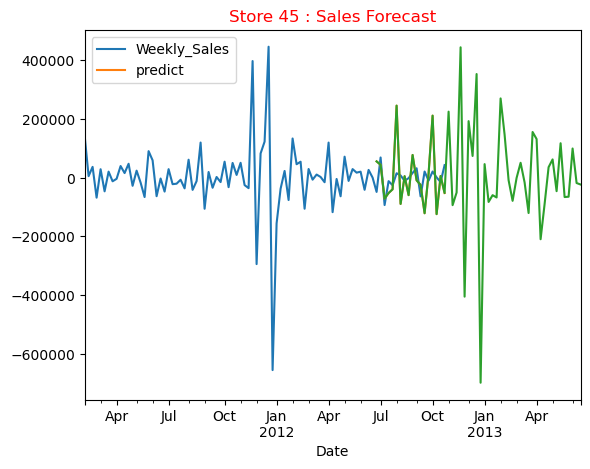

In [148]:
store_45_decompose_diff.plot()

forecast_45.plot()

plt.title(f'Store 45 : Sales Forecast', fontdict={'color' : 'Red'} )